# mnist 다층 레이어(Multi-Layer)로 이미지 분류 모델 개발

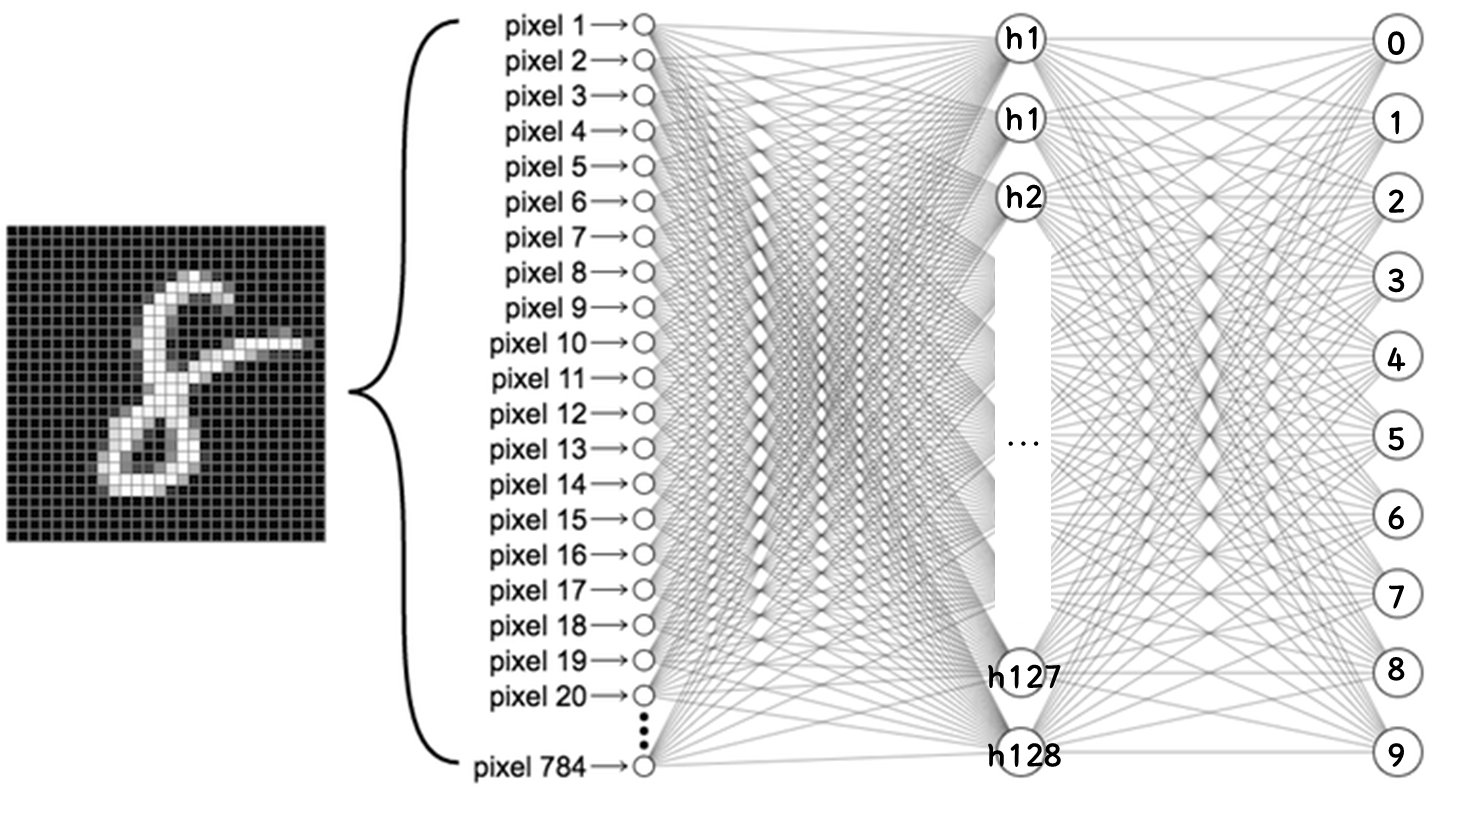

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 전처리
train_x = train_x.reshape(60000, 784)   # (60000, 28, 28) --> (60000, 784) 로 변환
train_y = pd.get_dummies(train_y)       # one-hot 인코딩

# 모델 설계
model = Sequential()
???
???
???



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10)

In [ ]:
model.summary() # 784(입력) * 노드별 가중치(128) + 128(바이어스) = 10,480    128 * 10 + 10 = 1,290

In [ ]:
# 모델 활용
pred = model.predict(train_x[0:5])
pd.DataFrame(pred).round(2)

In [ ]:
train_y[0:5]

# mnist 다층 레이어(Multi-Layer)로 이미지 분류 모델 개발 - 정규화 과정 추가

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd

# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 전처리
train_x = train_x.reshape(60000, 784)   # (60000, 28, 28) --> (60000, 784) 로 변환
????? # 정규화 해보기

train_y = pd.get_dummies(train_y)       # one-hot 인코딩

# 모델 설계
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10)

# mnist 다층 레이어(Multi-Layer)로 이미지 분류 모델 개발 - 손실함수 바꿔보기
다중분류의 손실함수 :
> categorical_crossentropy  
> sparse_categorical_crossentropy : one-hot 인코딩 하지 않아도 됨.

차이점(성능에는 차이가 없는 것으로 알려짐)
> "categorical_crossentropy"는 데이터의 라벨이 원-핫 인코딩 된 형태의 경우 사용  
> "sparse_categorical_crossentropy"는 데이터의 라벨이 Int형일 경우

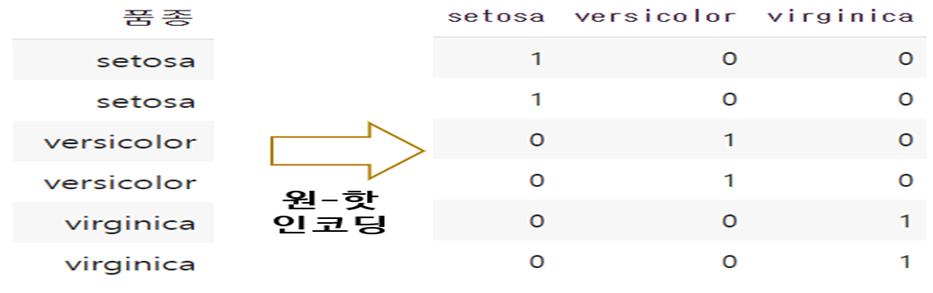

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 전처리
train_x = train_x.reshape(60000, 784)   # (60000, 28, 28) --> (60000, 784) 로 변환
train_x = train_x / 255.0               # 0 ~ 255 --> 0 ~ 1

# train_y = pd.get_dummies(train_y)       # one-hot 인코딩  ##########################################################

# 모델 설계
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='??????????????????', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10)

# mnist 다층 레이어(Multi-Layer)로 이미지 분류 모델 개발 - Flatten layer 활용
> train_x의 shape은 (60000, 28, 28)이고,
> train_x.reshape(60000, 784) 로 하나의 이미지를 1차원 배열로 펼쳤음  
>  
> Flatten(input_shape=(28, 28))이라는 레이어를 추가하면 같은 역할 수행


In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd

# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 전처리
# train_x = train_x.reshape(60000, 784)   #제거  ###################################################
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(28, 28)))            #############
############################       # Flatten 레이어에서 (60000, 25, 25) --> (60000,784)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10)

In [ ]:
model.summary()